In [0]:
def configure_plotly_browser_state():
``  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
from google.colab import drive
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
configure_plotly_browser_state()
ROOT = '/content/drive'     # Raíz del Drive por Default
PROJ = '/content/drive/My Drive/data_covid'       # Dirección del proyecto en donde este

drive.mount(ROOT, force_remount=True)           # Montamos el drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(join(PROJ, 'covid19_merged.csv'))

In [0]:
df.tail(5)

,Unnamed: 0,country,covid_confirmed_4_2_20,covid_deaths_4_2_20,covid_recovered_4_2_20,covid19_first_date,Flu_pneumonia_death_rate_per_100000,h1n1_Geographic_spread,h1n1_Intensity,h1n1_Impact_on_healthcare_services,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,first_school_closure_date,code_2digit_x,code_3digit_x,jan_temp,feb_temp,mar_temp,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,airport_traffic_2018_thousands,property_Affordability_Index,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,Population_2020,Density_KM2m,Fertility_rate,Median_age,Urban_pop_pct,gdp_usd_million,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_At_birth_CIA_estimate_2020,sex_male_to_female_0_14_years,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,sex_male_to_female_total,latitude,longitude
168,168,Uzbekistan,205,2,25,2020-03-15 22:00:00,24.69,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16 00:00:00,UZ,UZB,-3.034863,-1.554081,5.377054,14.095396,20.420429,25.343411,27.709891,25.305318,19.547165,11.627480,5.361304,0.034094,12.519383,21.377854,20.225034,33.721208,32.706521,19.264245,5.479880,3.296874,1.453488,2.382481,12.467757,17.115167,22.331115,191.821623,3056558.0,0.35,NaN,NaN,NaN,33469203.0,79,2.4,28,50%,60490.0,28.0,67.5,4.5,1.06,1.05,1.03,0.99,0.90,0.74,0.99,41.377491,64.585262
169,169,Venezuela,146,5,43,2020-03-14 22:00:00,24.12,W,*,mod,0.0,2187.0,135.0,2020-03-16 00:00:00,VE,VEN,25.027054,25.561830,26.127481,26.139563,25.612119,24.797970,24.615037,24.898251,25.237207,25.433841,25.394312,24.976403,25.318454,50.628879,46.001894,58.366174,131.538180,229.128058,296.503626,292.727268,267.290169,202.185586,170.716180,132.089682,80.478291,1957.653987,NaN,0.03,39.66,NaN,NaN,28435940.0,32,2.3,30,N.A.,70140.0,27.6,65.8,6.6,1.05,1.05,1.03,0.98,0.92,0.79,0.99,6.423750,-66.589730
170,170,Vietnam,233,0,75,2020-01-23 12:00:00,23.39,NaN,NaN,NaN,0.0,11186.0,58.0,2020-02-28 00:00:00,VN,VNM,19.458105,20.596500,22.063202,25.245719,26.833702,27.092026,27.170202,26.883482,26.062491,24.612851,22.423210,20.393939,24.069649,37.331351,25.840838,39.939719,73.477228,167.895702,228.475202,250.254272,264.184361,266.365966,236.874149,170.760018,73.761991,1835.160793,47049671.0,0.44,57.70,NaN,NaN,97338579.0,314,2.1,32,38%,261637.0,23.1,69.8,7.2,1.11,1.11,1.08,1.01,0.85,0.63,1,14.058324,108.277199
171,171,Zambia,39,1,0,2020-03-18 22:00:00,90.00,NaN,NaN,NaN,0.0,726.0,0.0,2020-03-20 00:00:00,ZM,ZMB,22.887856,22.936512,22.901632,21.911092,19.580152,17.362052,17.067240,19.471812,22.917512,24.669040,24.192320,23.112300,21.584132,224.087840,198.085600,154.738148,50.784104,4.677348,0.368186,0.052040,0.231134,3.630928,32.033640,111.564148,224.500080,1004.753196,8904.0,NaN,NaN,NaN,NaN,18383955.0,25,4.7,18,45%,23946.0,44.8,52.7,2.5,1.03,1.01,1.00,1.02,0.88,0.76,1,-13.133897,27.849332
172,172,Zimbabwe,9,1,0,2020-03-20 22:00:00,100.65,NaN,NaN,NaN,0.0,1318.0,0.0,2020-03-24 00:00:00,ZW,ZWE,23.899787,23.491309,22.916029,21.147287,18.398706,15.794618,15.642147,17.902919,21.365949,23.735250,24.232647,23.850044,21.031390,152.183810,136.242721,76.335971,32.508074,8.065668,3.666232,1.980051,2.409352,6.966292,27.394123,75.977831,145.244648,668.974773,282539.0,NaN,NaN,NaN,NaN,14862924.0,38,3.6,19,38%,12818.0,41.2,56.0,2.8,1.03,1.02,1.02,1.10,0.58,0.64,1.01,-19.015438,29.154857


In [0]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [0]:
df.dtypes[df.dtypes == np.object]

country                               object
covid19_first_date                    object
h1n1_Geographic_spread                object
h1n1_Intensity                        object
h1n1_Impact_on_healthcare_services    object
first_school_closure_date             object
code_2digit_x                         object
code_3digit_x                         object
Density_KM2m                          object
Fertility_rate                        object
Median_age                            object
Urban_pop_pct                         object
sex_male_to_female_total              object
dtype: object

In [0]:
# Convert to date time to better later manipulation
df['covid19_first_date'] = pd.to_datetime(df.covid19_first_date)

In [0]:
def missing_values(df):
    s_types = df.dtypes
    s_missing= df.isnull().sum()
    s_missingper= (df.isnull().sum()/df.shape[0])*100

    explo = pd.DataFrame({'Types': s_types,
                       'Missing': s_missing,
                      'Missing%': s_missingper,}).sort_values(by=['Missing%','Types'],ascending=False)
    return explo

def description(df):
    s_types = df.dtypes
    s_head= df.apply(lambda x: x[0:3].tolist())

    explo = pd.DataFrame({'Types': s_types,
                      'Head': s_head}).sort_values(by=['Types'],ascending=False)
    return explo

****

In [0]:
# Missing Values
pd.set_option("display.max_rows", None, "display.max_columns", None)
missing_values(df)

,Types,Missing,Missing%
ICU-CCB_beds_per_100000,float64,137,79.190751
hosp_beds_per_1000_2017,float64,136,78.612717
h1n1_Intensity,object,103,59.537572
h1n1_Impact_on_healthcare_services,object,103,59.537572
Health_Care_Index,float64,84,48.554913
h1n1_Geographic_spread,object,81,46.820809
property_Affordability_Index,float64,75,43.352601
airport_traffic_2018_thousands,float64,45,26.011561
first_school_closure_date,object,20,11.560694
jan_temp,float64,19,10.982659


In [16]:
# Countries that have ICU-CCB_beds_per_100000 defined
countries = df[~df["ICU-CCB_beds_per_100000"].isnull()]["country"]
print("Number of countries:", countries.count(), "\n")
countries

Number of countries: 36 



8           Australia
9             Austria
16            Belgium
29             Canada
33              China
42            Czechia
43            Denmark
53            Estonia
57            Finland
58             France
62            Germany
64             Greece
73            Hungary
74            Iceland
75              India
79            Ireland
81              Italy
83              Japan
87        South Korea
91             Latvia
96          Lithuania
97         Luxembourg
105            Mexico
114       Netherlands
120            Norway
128            Poland
129          Portugal
132            Russia
143          Slovakia
144          Slovenia
147             Spain
151            Sweden
152       Switzerland
161            Turkey
162     United States
166    United Kingdom
Name: country, dtype: object

In [17]:
# Countries that have hosp_beds_per_1000_2017 defined
countries = df[~df["hosp_beds_per_1000_2017"].isnull()]["country"]
print("Number of countries:", countries.count(), "\n")
countries

Number of countries: 37 



9             Austria
16            Belgium
29             Canada
32              Chile
33              China
34           Colombia
42            Czechia
43            Denmark
53            Estonia
57            Finland
58             France
62            Germany
64             Greece
73            Hungary
74            Iceland
79            Ireland
80             Israel
81              Italy
83              Japan
87        South Korea
91             Latvia
96          Lithuania
97         Luxembourg
105            Mexico
114       Netherlands
115       New Zealand
120            Norway
128            Poland
129          Portugal
132            Russia
143          Slovakia
144          Slovenia
147             Spain
151            Sweden
152       Switzerland
161            Turkey
166    United Kingdom
Name: country, dtype: object

In [20]:
# Description
description(df)

,Types,Head
Median_age,object,"[18, 36, 29]"
Urban_pop_pct,object,"[25%, 63%, 73%]"
sex_male_to_female_total,object,"[1.03, 0.98, 1.03]"
Density_KM2m,object,"[60, 105, 18]"
covid19_first_date,object,"[2020-02-24 22:00:00, 2020-03-09 22:00:00, 202..."
...,...,...
Jun_precip,float64,"[4.55918496175, 54.5791675258, 3.3737396628900..."
covid_recovered_4_2_20,int64,"[10, 76, 61]"
covid_deaths_4_2_20,int64,"[6, 16, 86]"
covid_confirmed_4_2_20,int64,"[273, 277, 986]"


In [21]:
df.describe()

,Unnamed: 0,covid_confirmed_4_2_20,covid_deaths_4_2_20,covid_recovered_4_2_20,Flu_pneumonia_death_rate_per_100000,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,jan_temp,feb_temp,mar_temp,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,airport_traffic_2018_thousands,property_Affordability_Index,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,Population_2020,gdp_usd_million,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_At_birth_CIA_estimate_2020,sex_male_to_female_0_14_years,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,latitude,longitude
count,173.000000,173.000000,173.000000,173.000000,155.000000,155.000000,1.550000e+02,155.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.280000e+02,98.000000,89.000000,37.000000,36.000000,1.670000e+02,1.590000e+02,161.000000,161.000000,161.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,168.000000,168.000000
mean,86.000000,5854.508671,306.225434,1215.231214,49.240774,0.187097,4.207245e+04,125.567742,12.438410,13.493708,15.681508,18.171207,20.276551,21.574657,22.266949,22.157897,20.855220,18.645324,15.725174,13.330652,17.884767,72.287258,64.973240,72.599535,78.605332,94.800486,105.025192,109.648366,111.769035,106.737303,99.877950,86.137485,78.533274,1080.994457,3.157781e+07,1.122449,63.693483,4.730000,11.947222,4.481979e+07,5.398848e+05,26.662236,64.161615,9.168075,1.051768,1.045854,1.051220,1.049390,0.960793,0.798171,21.250351,16.270651
std,50.084928,24401.729089,1492.722521,6710.160901,46.638156,0.391253,2.925658e+05,387.390940,13.210414,12.908140,11.362756,9.263054,7.481935,6.473323,5.933407,5.791292,6.561729,8.321093,10.536792,12.227137,8.531744,74.840653,64.455740,70.448597,65.217281,80.851156,99.852472,106.722544,105.528897,99.981499,92.603574,77.987646,74.048288,756.951881,9.957551e+07,0.751336,10.401654,2.648854,9.267346,1.587376e+08,2.116864e+06,10.324133,6.500536,6.266105,0.027131,0.030049,0.141268,0.367177,0.275053,0.167922,23.632944,59.715510
min,0.000000,1.000000,0.000000,0.000000,2.910000,0.000000,1.000000e+00,0.000000,-26.996723,-24.724805,-18.716611,-9.787481,-0.286831,4.397863,4.044053,4.836352,3.453914,-5.334418,-17.637772,-24.074011,-7.144580,0.000000,0.265557,0.000000,0.170000,0.716934,0.006190,0.000000,0.115000,0.000000,0.227780,0.017742,0.000000,32.913309,3.160000e+02,0.030000,39.660000,1.380000,1.200000,8.010000e+02,5.930000e+02,12.900000,47.200000,1.100000,0.940000,0.970000,0.830000,0.710000,0.580000,0.450000,-40.900557,-106.346771
25%,43.000000,24.000000,0.000000,1.000000,15.605000,0.000000,1.140000e+02,1.000000,-0.145747,1.186277,4.951347,9.445359,14.049690,16.384140,17.972238,18.478202,15.332715,10.790457,5.800537,1.797167,9.997236,20.298275,20.713276,32.665691,34.386787,32.839156,28.908056,25.376275,24.631150,26.952224,35.712600,30.424430,22.359041,543.931030,5.767044e+05,0.600000,56.210000,2.960000,6.475000,2.879425e+06,1.438250e+04,17.500000,60.700000,3.800000,1.040000,1.030000,1.010000,0.970000,0.867500,0.710000,7.497422,-9.496285
50%,86.000000,277.000000,5.000000,20.000000,26.640000,0.000000,7.700000e+02,19.000000,18.854543,19.996806,21.520745,21.892916,21.815049,23.231922,23.006598,23.341244,22.812769,22.338043,20.810021,19.783161,21.508805,45.100056,44.179162,51.334227,59.595253,72.866393,73.768771,74.430168,75.813772,68.618952,69.781847,64.551892,53.440114,974.957234,3.176756e+06,0.980000,64.580000,4.210000,9.150000,9.904607e+06,5.991800e+0

In [0]:
from pandas_profiling import ProfileReport

In [0]:
corr_matrix = df.corr()
corr_matrix["covid_confirmed_4_2_20"].sort_values(ascending=False)

covid_confirmed_4_2_20                           1.000000
gdp_usd_million                                  0.824192
airport_traffic_2018_thousands                   0.788057
covid_deaths_4_2_20                              0.784409
h1n1_Deaths_confirmed                            0.626345
covid_recovered_4_2_20                           0.572666
h1n1_Cases_confirmed                             0.425893
ICU-CCB_beds_per_100000                          0.403250
property_Affordability_Index                     0.351349
Population_2020                                  0.300173
age_over_65_years_percent                        0.290500
h1n1_Cases_underestimate                         0.239156
Health_Care_Index                                0.207738
latitude                                         0.190129
sex_male_to_female_At_birth_CIA_estimate_2020    0.107757
sex_male_to_female_0_14_years                    0.103132
Unnamed: 0                                       0.092777
age_15_to_64_y

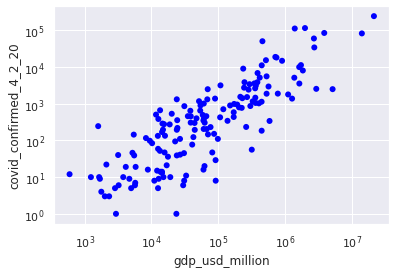

In [40]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(x=df['gdp_usd_million'], y=df['covid_confirmed_4_2_20'] , c='blue', edgecolors='none')
plt.xlabel("gdp_usd_million")
plt.ylabel("covid_confirmed_4_2_20")
ax.set_yscale('log')
ax.set_xscale('log')

In [32]:
corr_matrix = df.corr()
corr_matrix["covid_deaths_4_2_20"].sort_values(ascending=False)

covid_deaths_4_2_20                              1.000000
covid_confirmed_4_2_20                           0.784409
h1n1_Cases_confirmed                             0.743643
covid_recovered_4_2_20                           0.538388
gdp_usd_million                                  0.425068
airport_traffic_2018_thousands                   0.380454
h1n1_Deaths_confirmed                            0.302893
age_over_65_years_percent                        0.300983
property_Affordability_Index                     0.210066
Health_Care_Index                                0.193683
latitude                                         0.175702
Population_2020                                  0.174590
h1n1_Cases_underestimate                         0.141242
ICU-CCB_beds_per_100000                          0.097667
sex_male_to_female_At_birth_CIA_estimate_2020    0.092430
sex_male_to_female_0_14_years                    0.072902
Unnamed: 0                                       0.067596
age_15_to_64_y

In [33]:
corr_matrix = df.corr()
corr_matrix["covid_recovered_4_2_20"].sort_values(ascending=False)

covid_recovered_4_2_20                           1.000000
Population_2020                                  0.619333
gdp_usd_million                                  0.594441
airport_traffic_2018_thousands                   0.576549
covid_confirmed_4_2_20                           0.572666
covid_deaths_4_2_20                              0.538388
sex_male_to_female_0_14_years                    0.302045
h1n1_Cases_confirmed                             0.277413
sex_male_to_female_At_birth_CIA_estimate_2020    0.274116
h1n1_Deaths_confirmed                            0.226380
age_over_65_years_percent                        0.170889
latitude                                         0.138602
Health_Care_Index                                0.123145
age_15_to_64_years_percent                       0.116067
longitude                                        0.089259
h1n1_Cases_underestimate                         0.059905
sex_male_to_female_15_24_years                   0.041842
sex_male_to_fe

In [0]:
import matplotlib
from matplotlib import cm
import numpy as np

norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

In [42]:
df.columns

Index(['Unnamed: 0', 'country', 'covid_confirmed_4_2_20',
       'covid_deaths_4_2_20', 'covid_recovered_4_2_20', 'covid19_first_date',
       'Flu_pneumonia_death_rate_per_100000', 'h1n1_Geographic_spread',
       'h1n1_Intensity', 'h1n1_Impact_on_healthcare_services',
       'h1n1_Cases_underestimate', 'h1n1_Cases_confirmed',
       'h1n1_Deaths_confirmed', 'first_school_closure_date', 'code_2digit_x',
       'code_3digit_x', 'jan_temp', 'feb_temp', 'mar_temp', 'apr_temp',
       'may_temp', 'jun_temp', 'july_temp', 'aug_temp', 'sept_temp',
       'oct_temp', 'nov_temp', 'dec_temp', 'annual_temp', 'Jan_precip',
       'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip', 'Jun_precip',
       'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip', 'Nov_precip',
       'Dec_precip', 'Annual_precip', 'airport_traffic_2018_thousands',
       'property_Affordability_Index', 'Health_Care_Index',
       'hosp_beds_per_1000_2017', 'ICU-CCB_beds_per_100000', 'Population_2020',
       'Den

In [51]:
# CoronavirusMap
# There's a problem because sometimes the bigger circles overlap the small ones. 
import plotly.graph_objects as go
df_map = df

df_map['text'] = 'country' + df_map['country'] + '<br>Confirmed cases:' + df_map['covid_confirmed_4_2_20'].astype(str) + '<br>Fatalities:' +df_map['covid_deaths_4_2_20'].astype(str)
autumn_cmap = matplotlib.cm.get_cmap('autumn_r')
autumn = matplotlib_to_plotly(autumn_cmap, 255)
fig = go.Figure(data=go.Scattergeo(
        lon = df_map['longitude'],
        lat = df_map['latitude'],
        text = df_map['text'],
        mode = 'markers',     
        marker = dict(
            size = df_map['covid_confirmed_4_2_20']*0.0002 + 1,
            opacity = 0.6,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.1,
                color='Black'
            ),
            colorscale = autumn,
            cmin = df_map['covid_deaths_4_2_20'].min(),
            cmax = df_map['covid_deaths_4_2_20'].max(),
            color = df_map['covid_deaths_4_2_20'],            
            colorbar_title="Cantidad de muertos",           
        ),
))

fig.update_geos(
    projection_type="kavrayskiy7",
    showcountries=True, countrycolor="#303338",
    showcoastlines=True, coastlinecolor="black",
    showland=True, landcolor="gray",
    showocean=True, oceancolor="dodgerblue",
    showlakes=False,  
    #  lataxis = dict (
    #         range= [ -60, 90 ]
    #     )  
)

fig.update_layout(
        title = 'Casos confirmados de coronavirus en el mundo',      
       
    )
fig.show()